In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time

%matplotlib inline

D:\Anaconda3\envs\opensource\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda3\envs\opensource\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda3\envs\opensource\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 로지스틱 회귀분석

In [2]:
# Personal Loan 데이터 불러오기
ploan = pd.read_csv('./Personal Loan.csv')
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# 의미없는 변수 제거(ID, ZIP Code)
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis = 1, inplace = False)

In [4]:
# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant = "add")
ploan_processed.head()

D:\Anaconda3\envs\opensource\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


# 설명변수(X), 종속변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [5]:
feature_columns = ploan_processed.columns.difference(['Personal Loan'])
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [6]:
# stratify는 훈련/테스트 데이터들이 원래의 input dataset의 클래스의 비율과 같은 비율을 가지도록 할 것인지 지정한다. 
# 예를 들어 0,1의 클래스가 input dataset에 20:80 비율로 있었다면,
# 훈련 데이터와 테스트 데이터 역시 각각의 클래스가 같은 비율로 있도록 지정할 수 있다. 
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 로지스틱 회귀모형 모델링 y = f(x)

In [7]:
model = sm.Logit(train_y, train_x)
fitted_full_model = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [8]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 14 Jul 2020   Pseudo R-squ.:                  0.6030
Time:                        10:42:04   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [9]:
fitted_full_model.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [10]:
np.exp(fitted_full_model.params)

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [12]:
# y_hat 예측
pred_y = fitted_full_model.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [15]:
# 로지스틱 회귀의 결과는 확률 값이므로, threshold를 지정하여 0 또는 1로 분류한다.
def cut_off(y, threshold):
    Y = y.copy()  # copy 함수를 사용하여 이전의 y 값이 변하지 않도록 함
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return Y.astype(int)

pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int32

In [16]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [20]:
# confusion matrix accuracy
def calculate_acc(cf_matrix):
    return (cf_matrix[0, 0] + cf_matrix[1, 1]) / (cf_matrix[0, 0] + cf_matrix[0, 1] + cf_matrix[1, 0] + cf_matrix[1, 1])

In [21]:
calculate_acc(cfmat)

0.9466666666666667

# 임계값(cut-off)에 따른 성능지표 비교

In [22]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = calculate_acc(cfmat)
table.index.name = 'threshold'
table

,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC :  0.9463923891858513


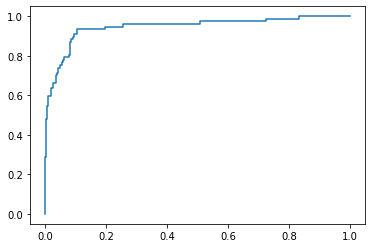

In [23]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label = 1)
# print ROC curve
plt.plot(fpr, tpr)
# print AUC
auc = np.trapz(tpr, fpr)
print('AUC : ', auc)

In [33]:
# full model에서 z value 값이 가장 높은 experience, mortage 변수 제거
feature_columns = list(ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']
# print(X)

      Age  CCAvg  CD Account  CreditCard  Education  Family  Income  Online  \
0      25    1.6           0           0          1       4      49       0   
1      45    1.5           0           0          1       3      34       0   
2      39    1.0           0           0          1       1      11       0   
3      35    2.7           0           0          2       1     100       0   
4      35    1.0           0           1          2       4      45       0   
...   ...    ...         ...         ...        ...     ...     ...     ...   
2495   46    1.9           0           1          1       4      70       0   
2496   63    0.7           0           0          2       3      32       0   
2497   33    0.9           0           0          3       3      14       0   
2498   38    6.1           0           0          1       2     111       0   
2499   53    2.8           0           0          2       4      38       1   

      Securities Account  const  
0                

In [34]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(1750, 10) (750, 10) (1750,) (750,)


In [35]:
# 로지스틱 모델 적합
model2 = sm.Logit(train_y2, train_x2)
fitted_model = model2.fit(method="newton")

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [36]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Tue, 14 Jul 2020   Pseudo R-squ.:                  0.6029
Time:                        11:35:49   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [37]:
# 예측
pred_y2 = fitted_model.predict(test_x2)

In [41]:
# threshold = 0.5
pred_y2 = cut_off(pred_y2, 0.5)

In [43]:
# accuracy 계산
cfmat = confusion_matrix(test_y2, pred_y2)
print(calculate_acc(cfmat))

0.944


In [45]:
# 임계 값에 따른 accuracy 비교
threshold = np.arange(0, 1, 0.1)
pred_y2 = fitted_model.predict(test_x2)
table = pd.DataFrame(columns=['ACC'])

for i in threshold:
    pred_Y = cut_off(pred_y2, i)
    cfmat = confusion_matrix(test_y2, pred_Y)
    table.loc[i] = calculate_acc(cfmat)
table.index.name = 'threshold'
table

,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


# 변수선택법

In [46]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [47]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [48]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])   
    regr = model.fit()  
    AIC = regr.aic    
    return {"model" : regr, "AIC" : AIC}

In [50]:
# 전진 선택법
def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X = X, y = y, feature_set = predictors+[p]+['const']))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].idxmin()]
    toc = time.time()
    
    print("Processed ", models.shape[0], " models on ", len(predictors) + 1, "predictors in ", (toc-tic))
    print("Selected predictors: ", best_model['model'].model.exog_names, 'AIC : ', best_model['AIC'])
    
    return best_model

# 전진 선택법 모델
def forward_model(X, y):
    Fmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X = X, y = y, predictors = predictors)
        
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
                
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i, 'model'].model.exog_names
        Fmodel_before = Fmodels.loc[i, 'AIC']
        predictors = [predictor for predictor in predictors if predictor != 'const']
        
    toc = time.time()
    print("Total elapsed time : {}".format(toc-tic))   
    return Fmodels.loc[len(Fmodels['model']), "model"]

In [51]:
# 후진 소거법
def backward(X,y,predictors):
    results = []   
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)    
    best_model = models.loc[models['AIC'].argmin()]
    
    return best_model

# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    
    full_model_predictors = X.columns.difference(['const'])
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)
    Bmodel_before_aic = Bmodel_before['AIC']
    
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        
        if Backward_result['AIC'] > Bmodel_before_aic:
            break
       
        # insert model tuple in dataframe, and update predictor set, AIC threshold
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before_aic = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    if (len(predictors) == len(full_model_predictors)):   #  while문을 탈출한 순간이 첫 번째 변수를 삭제한 순간인 경우
        return pd.DataFrame({'AIC' : Bmodel_before['AIC'], 'model' : Bmodel_before['model']})
    else:
        return (Bmodels['model'].dropna().iloc[0])

In [52]:
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    
    # 시작은 전진 선택법(base)
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        # 전진 선택법 시행 후, 후진 소거법 시행
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        mid_model = Forward_result
        predictors = mid_model['model'].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        print('backward')    
        
        # 전진 선택법의 결과와 후진 소거법의 결과를 비교하여, AIC 값이 더 낮은 결과를 채팩
        if Backward_result['AIC']< Forward_result['AIC']:
            mid_model = Backward_result
            predictors = mid_model['model'].model.exog_names
            predictors = [ k for k in predictors if k != 'const']
        
        # 채택한 선택법의 AIC 결과가 threshold AIC 값보다 높은 경우, 더 이상 프로세스를 실행할 수 없음
        if mid_model['AIC'] > Smodel_before:
            break
        # 채택한 선택법의 AIC 결과가 threshold AIC 값보다 낮은 경우,
        # Stepmodels 데이터프레임 데이터 추가 및 threshold AIC 값을 업데이트
        else:
            Stepmodels.loc[i] = mid_model
            Smodel_before = Stepmodels.loc[i]['AIC']
        
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    
    # i = 1에서, break 문을 만난 경우 Stepmodels 데이터프레임 내부에는 데이터가 없음
    if Stepmodels.iloc[0] is None:
        return processSubset(X, y, ['const'])['model']
    else:
        return (Stepmodels['model'][len(Stepmodels['model'])])

In [53]:
Forward_best_model = forward_model(X = train_x, y = train_y)

Processed  11  models on  1 predictors in  0.09800577163696289
Selected predictors:  ['Income', 'const'] AIC :  239.9207874222875
Processed  10  models on  2 predictors in  0.014000654220581055
Selected predictors:  ['Income', 'CD Account', 'const'] AIC :  92.75806832710532
Processed  9  models on  3 predictors in  0.012000560760498047
Selected predictors:  ['Income', 'CD Account', 'Education', 'const'] AIC :  -32.73874624530072
Processed  8  models on  4 predictors in  0.012000560760498047
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'const'] AIC :  -83.87480926714943
Processed  7  models on  5 predictors in  0.011000633239746094
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'const'] AIC :  -96.44896666582645
Processed  6  models on  6 predictors in  0.012000799179077148
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'CreditCard', 'const'] AIC :  -111.09343299897228
Proc

In [54]:
Backward_best_model = backward_model(X = train_x, y = train_y)

Total elapsed time: 0.10500597953796387 seconds.


D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  import sys


In [55]:
Stepwise_best_model = Stepwise_model(X = train_x, y = train_y)

Processed  11  models on  1 predictors in  0.02800154685974121
Selected predictors:  ['Income', 'const'] AIC :  239.9207874222875
forward
backward
Processed  10  models on  2 predictors in  0.015001058578491211
Selected predictors:  ['Income', 'CD Account', 'const'] AIC :  92.75806832710532
forward
backward
Processed  9  models on  3 predictors in  0.014000415802001953
Selected predictors:  ['Income', 'CD Account', 'Education', 'const'] AIC :  -32.73874624530072
forward
backward
Processed  8  models on  4 predictors in  0.011000871658325195
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'const'] AIC :  -83.87480926714943
forward
backward
Processed  7  models on  5 predictors in  0.010000467300415039
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'const'] AIC :  -96.44896666582645
forward
backward
Processed  6  models on  6 predictors in  0.009000778198242188
Selected predictors:  ['Income', 'CD Account', 'Education', '

D:\Anaconda3\envs\opensource\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  import sys


 3  models on  9 predictors in  0.006000518798828125
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'CreditCard', 'CCAvg', 'Online', 'Experience', 'const'] AIC :  -112.07572514896219
forward
backward
Processed  3  models on  9 predictors in  0.0060002803802490234
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'CreditCard', 'CCAvg', 'Online', 'Experience', 'const'] AIC :  -112.07572514896219
forward
backward
Total elapsed time: 0.2950167655944824 seconds.


In [56]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(9,) (9,) (9,)


In [58]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_fitted = fitted_model.predict(test_x2)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [59]:
pred_Y_fitted = cut_off(pred_y_fitted, 0.5)
pred_Y_forward = cut_off(pred_y_forward, 0.5)
pred_Y_backward = cut_off(pred_y_backward, 0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5)

In [60]:
cfmat_fitted = confusion_matrix(test_y2, pred_Y_fitted)
cfmat_forward = confusion_matrix(test_y2, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y2, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y2, pred_Y_stepwise)

In [61]:
print("Accuracy of fitted : {}".format(calculate_acc(cfmat_fitted)))
print("Accuracy of forward : {}".format(calculate_acc(cfmat_forward)))
print("Accuracy of backward : {}".format(calculate_acc(cfmat_backward)))
print("Accuracy of stepwise : {}".format(calculate_acc(cfmat_stepwise)))

Accuracy of fitted : 0.944
Accuracy of forward : 0.932
Accuracy of backward : 0.932
Accuracy of stepwise : 0.932


In [63]:
print(len(fitted_model.model.exog_names))
print(len(Forward_best_model.model.exog_names))
print(len(Backward_best_model.model.exog_names))
print(len(Stepwise_best_model.model.exog_names))

10
9
9
9
